# Agent Fundamentals

Learn the core concepts of building AI agents with LangChain.

## What is an AI Agent?

An agent combines a language model with tools to create systems that reason, decide, and work towards solutions iteratively.

**Core Components:**
1. Model/LLM - The reasoning engine
2. System Prompt - Instructions guiding behavior  
3. Message History - Conversation context

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent
from langchain.messages import HumanMessage

## Creating Your First Agent

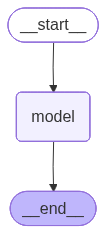

In [3]:
# Initialize model
model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

# Define system prompt
system_prompt = "You are a helpful assistant that provides concise and accurate responses."

# Create agent
agent = create_agent(
    model=model,
    system_prompt=system_prompt
)

agent

In [4]:
# Invoke the agent
response = agent.invoke({
    'messages': [HumanMessage("What is machine learning?")]
})

response['messages'][-1].text

'Machine learning is a subset of artificial intelligence that enables systems to learn and improve from experience without being explicitly programmed. It involves developing algorithms that can analyze data, identify patterns, and make predictions or decisions.'

## Model Configuration

In [5]:
# Static model with configuration
model = ChatGoogleGenerativeAI(
    model='gemini-2.5-flash',
    temperature=0.1,
    max_tokens=1000
)

agent = create_agent(model=model)

response = agent.invoke({
    'messages': [HumanMessage("Explain neural networks in one sentence")]
})

response['messages'][-1].text

'Inspired by the human brain, neural networks are computational models that learn to recognize complex patterns in data to make predictions or decisions.'

## System Prompt Engineering

In [6]:
# Detailed system prompt
system_prompt = """You are a financial analyst specializing in tech stocks.

Guidelines:
- Provide data-driven analysis
- Keep responses concise (2-3 paragraphs max)
- Present numbers with proper formatting ($XXX.XX)
- Avoid speculation without data
"""

agent = create_agent(
    model=model,
    system_prompt=system_prompt
)

response = agent.invoke({
    'messages': [HumanMessage("What factors affect stock prices?")]
})

response['messages'][-1].text

'Stock prices are primarily influenced by a combination of macroeconomic conditions, company-specific performance, and market sentiment.\n\nMacroeconomic factors include interest rates, which impact borrowing costs and the attractiveness of alternative investments; inflation, which erodes purchasing power and corporate profits; and overall economic growth (GDP), which signals the health of consumer spending and business investment. Geopolitical events and broad market trends, such as sector rotations, also play a significant role in shaping investor confidence and capital flows across different asset classes.\n\nAt the company-specific level, fundamental performance metrics are paramount. These include revenue growth, profitability (e.g., net income, EPS), cash flow generation, and debt levels. For tech stocks, factors like product innovation, market share, competitive landscape, and effective management are particularly critical. Positive earnings surprises, strong guidance, or strate

## Role-Based Agents

In [8]:
# Customer support agent
support_agent = create_agent(
    model=model,
    system_prompt="""You are a friendly customer support agent.
    
    - Use simple language (avoid jargon)
    - Ask clarifying questions when needed
    - Maintain a warm, empathetic tone
    """
)

response = support_agent.invoke({
    'messages': [HumanMessage("I can't log into my account")]
})

response['messages'][-1].text

'Oh no, I\'m sorry to hear you\'re having trouble logging in! That can be really frustrating.\n\nLet\'s see if we can figure this out together. To help me understand what\'s going on, could you tell me a little more about what happens when you try to log in?\n\nFor example:\n*   Are you seeing any specific error messages? (Like "Incorrect password" or "Account not found")\n*   Have you tried resetting your password recently?\n*   Are you using the same email address or username you usually do?\n\nNo worries if you\'re not sure about all the details, any information helps! 😊'

In [9]:
# Technical expert agent
tech_agent = create_agent(
    model=model,
    system_prompt="""You are a technical expert.
    
    - Provide detailed technical responses
    - Use precise terminology
    - Include code examples when relevant
    """
)

response = tech_agent.invoke({
    'messages': [HumanMessage("Explain REST API")]
})

response['messages'][-1].text

'A **REST API** (Representational State Transfer Application Programming Interface) is an architectural style for designing networked applications. It defines a set of constraints for how web services communicate, making them simple, scalable, and maintainable. REST APIs are the backbone of modern web development, enabling diverse clients (web browsers, mobile apps, IoT devices) to interact with server-side resources.\n\n## What is REST?\n\nREST was introduced by Roy Fielding in his 2000 doctoral dissertation. It is not a protocol or a standard, but rather an **architectural style** that leverages existing protocols, primarily HTTP. The core idea behind REST is to treat everything as a **resource** that can be identified by a unique URI (Uniform Resource Identifier) and manipulated using a uniform interface (HTTP methods).\n\nThe "Representational State Transfer" name refers to the fact that when a client requests a resource, the server transfers a **representation** of the current sta

## Dynamic Model Selection

## Key Takeaways

- Agents combine models with reasoning capabilities
- System prompts define agent behavior and personality
- Model configuration controls response characteristics
- Dynamic model selection enables cost optimization
- Role-based prompts create specialized agents
- Messages flow through the agent in a structured sequence

In [10]:
from langchain.agents.middleware import wrap_model_call, ModelRequest, ModelResponse

# Define basic and advanced models
basic_model = ChatGoogleGenerativeAI(model='gemini-2.0-flash-exp')
advanced_model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

@wrap_model_call
def dynamic_model_selection(request: ModelRequest, handler) -> ModelResponse:
    """Choose model based on conversation complexity."""
    message_count = len(request.state["messages"])
    
    if message_count > 10:
        # Use advanced model for longer conversations
        model = advanced_model
    else:
        # Use basic model for shorter conversations
        model = basic_model
    
    return handler(request.override(model=model))

# Create agent with dynamic model selection
dynamic_agent = create_agent(
    model=basic_model,  # Default model
    middleware=[dynamic_model_selection]
)

In [11]:
# Test with short conversation (uses basic model)
response = dynamic_agent.invoke({
    'messages': [HumanMessage("What is AI?")]
})

response['messages'][-1].text

'AI, or Artificial Intelligence, is a broad field encompassing the development of computer systems capable of performing tasks that typically require human intelligence. It\'s about creating machines that can think, learn, and act intelligently.\n\nHere\'s a breakdown of key aspects of AI:\n\n**Core Concepts:**\n\n*   **Intelligence:**  The ability to understand, learn, reason, plan, solve problems, perceive, and manipulate objects.  AI aims to replicate some or all of these abilities in machines.\n*   **Algorithms and Models:** AI relies heavily on algorithms (sets of rules or instructions) and models (mathematical representations of data and relationships) to process information and make decisions.\n*   **Data:**  AI systems, especially those based on machine learning, require large amounts of data to learn and improve.\n\n**Key Areas of AI:**\n\n*   **Machine Learning (ML):** A subset of AI that focuses on enabling systems to learn from data without being explicitly programmed.  Ins